#PROJETO DE APRENDIZADO DE MÁQUINA
###Grupo: Vitor Zimbrunes Pamplona
###Matrícula: 20190038570

# INTRODUÇÃO
## Um conjunto de dados foi criado a partir de uma instituição de ensino superior (https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) relacionado aos estudantes matriculados em diferentes cursos de graduação, como agronomia, design, educação, enfermagem, jornalismo, administração, serviço social e tecnologias. Os dados são utilizados para construir modelos de classificação que preveem a evasão e o sucesso acadêmico dos estudantes.

# PARTE 1 - TRATAMENTO DOS DADOS

####Para o tratamento dos dados, começamos realizando a análise das linhas e colunas, verificando valores faltantes no conjunto de dados. Substituímos esses valores pela média das colunas e transformamos as variáveis em categóricas. Após o tratamento dos dados, verificamos a quantidade de amostras e parâmetros do conjunto de dados para construir as matrizes X e Y para o classificador.

####Utilizamos a regra de ouro de redes neurais com duas camadas para calcular a divisão dos dados entre treinamento e teste, onde d é o número de features. Ao construir o conjunto de treino e teste, verificamos as features mais importantes do conjunto de dados e selecionamos aquelas que têm maior relevância. Ao fazer a matriz de correlação, obtivemos uma melhor compreensão dos dados mais importantes no conjunto de dados.

####Com base nisso, reestruturamos o conjunto de dados, separando novamente os dados entre treinamento e teste.

####Ao fazer a normalização dos dados ou a padronização nos vimos uma piora no resultados dos modelos por isto optamos não realizar a mudança nos dados.

## IMPORTAÇÃO DE BIBLIOTECAS

In [163]:
# TRATAMENTO E VISUALIZAÇÃO DE DADOS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from yellowbrick.model_selection import FeatureImportances
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

# APRENDIZADO DE MÁQUINA

# --- REDE NEURAL --- #
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import optimizers
from sklearn import model_selection
from keras import regularizers
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder, StandardScaler

# --- ÁRVORE DE DECISÃO --- #
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

# --- SVM --- #
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

# SELECIONAR MELHORES PARÂMETROS
from sklearn.model_selection import GridSearchCV

# SEPARAR TREINO E TESTE
from sklearn.model_selection import train_test_split

## IMPORTAÇÃO DO DATASET

In [164]:
df_eff = pd.read_csv("/content/data.csv", delimiter=';')

In [165]:
df_eff.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## VISUALIZANDO INFORMAÇÕES

In [166]:
df_eff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

## FUNÇÃO PARA INFORMAR SOBRE POSSÍVEIS VALORES PERDIDOS

In [167]:
def missing_values_table(df):
  # Total de valores perdidos
  mis_val = df.isnull().sum()

  # Porcentagem dos valores perdidos
  mis_val_percent = 100 * df.isnull().sum() / len(df)

  # Cria uma tabela com os resultados
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

  # Renomeia as colunas
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : "Valores Perdidos", 1 : "% dos Valores Totais"})

  # Coloca a porcentagem de perdidos de forma decrescente
  mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
  "% dos Valores Totais", ascending=False)

  # Mostra algumas informações como sumário
  print ("O dataframe selecionado tem " + str(df.shape[1]) + " colunas.\n"
    "Existem " + str(mis_val_table_ren_columns.shape[0]) +
      " colunas que possuem valores perdidos.")

  # Retorna o dataframe com os valores perdidos
  return mis_val_table_ren_columns

In [168]:
missing_values_table(df_eff)

O dataframe selecionado tem 37 colunas.
Existem 0 colunas que possuem valores perdidos.


,Valores Perdidos,% dos Valores Totais


## TRANSFORMAR VARIÁVEIS CATEGÓRICAS E EXCLUIR A ANTIGA COLUNA TARGET

In [169]:
label = LabelEncoder()

cat_subset_countries = df_eff['Target'].values
cat_subset_countries = label.fit_transform(cat_subset_countries)
df_eff.loc[:, 'Target_Encode'] = cat_subset_countries

In [170]:
df_eff = df_eff.drop('Target',axis=1)

In [171]:
df_eff

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Encode
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


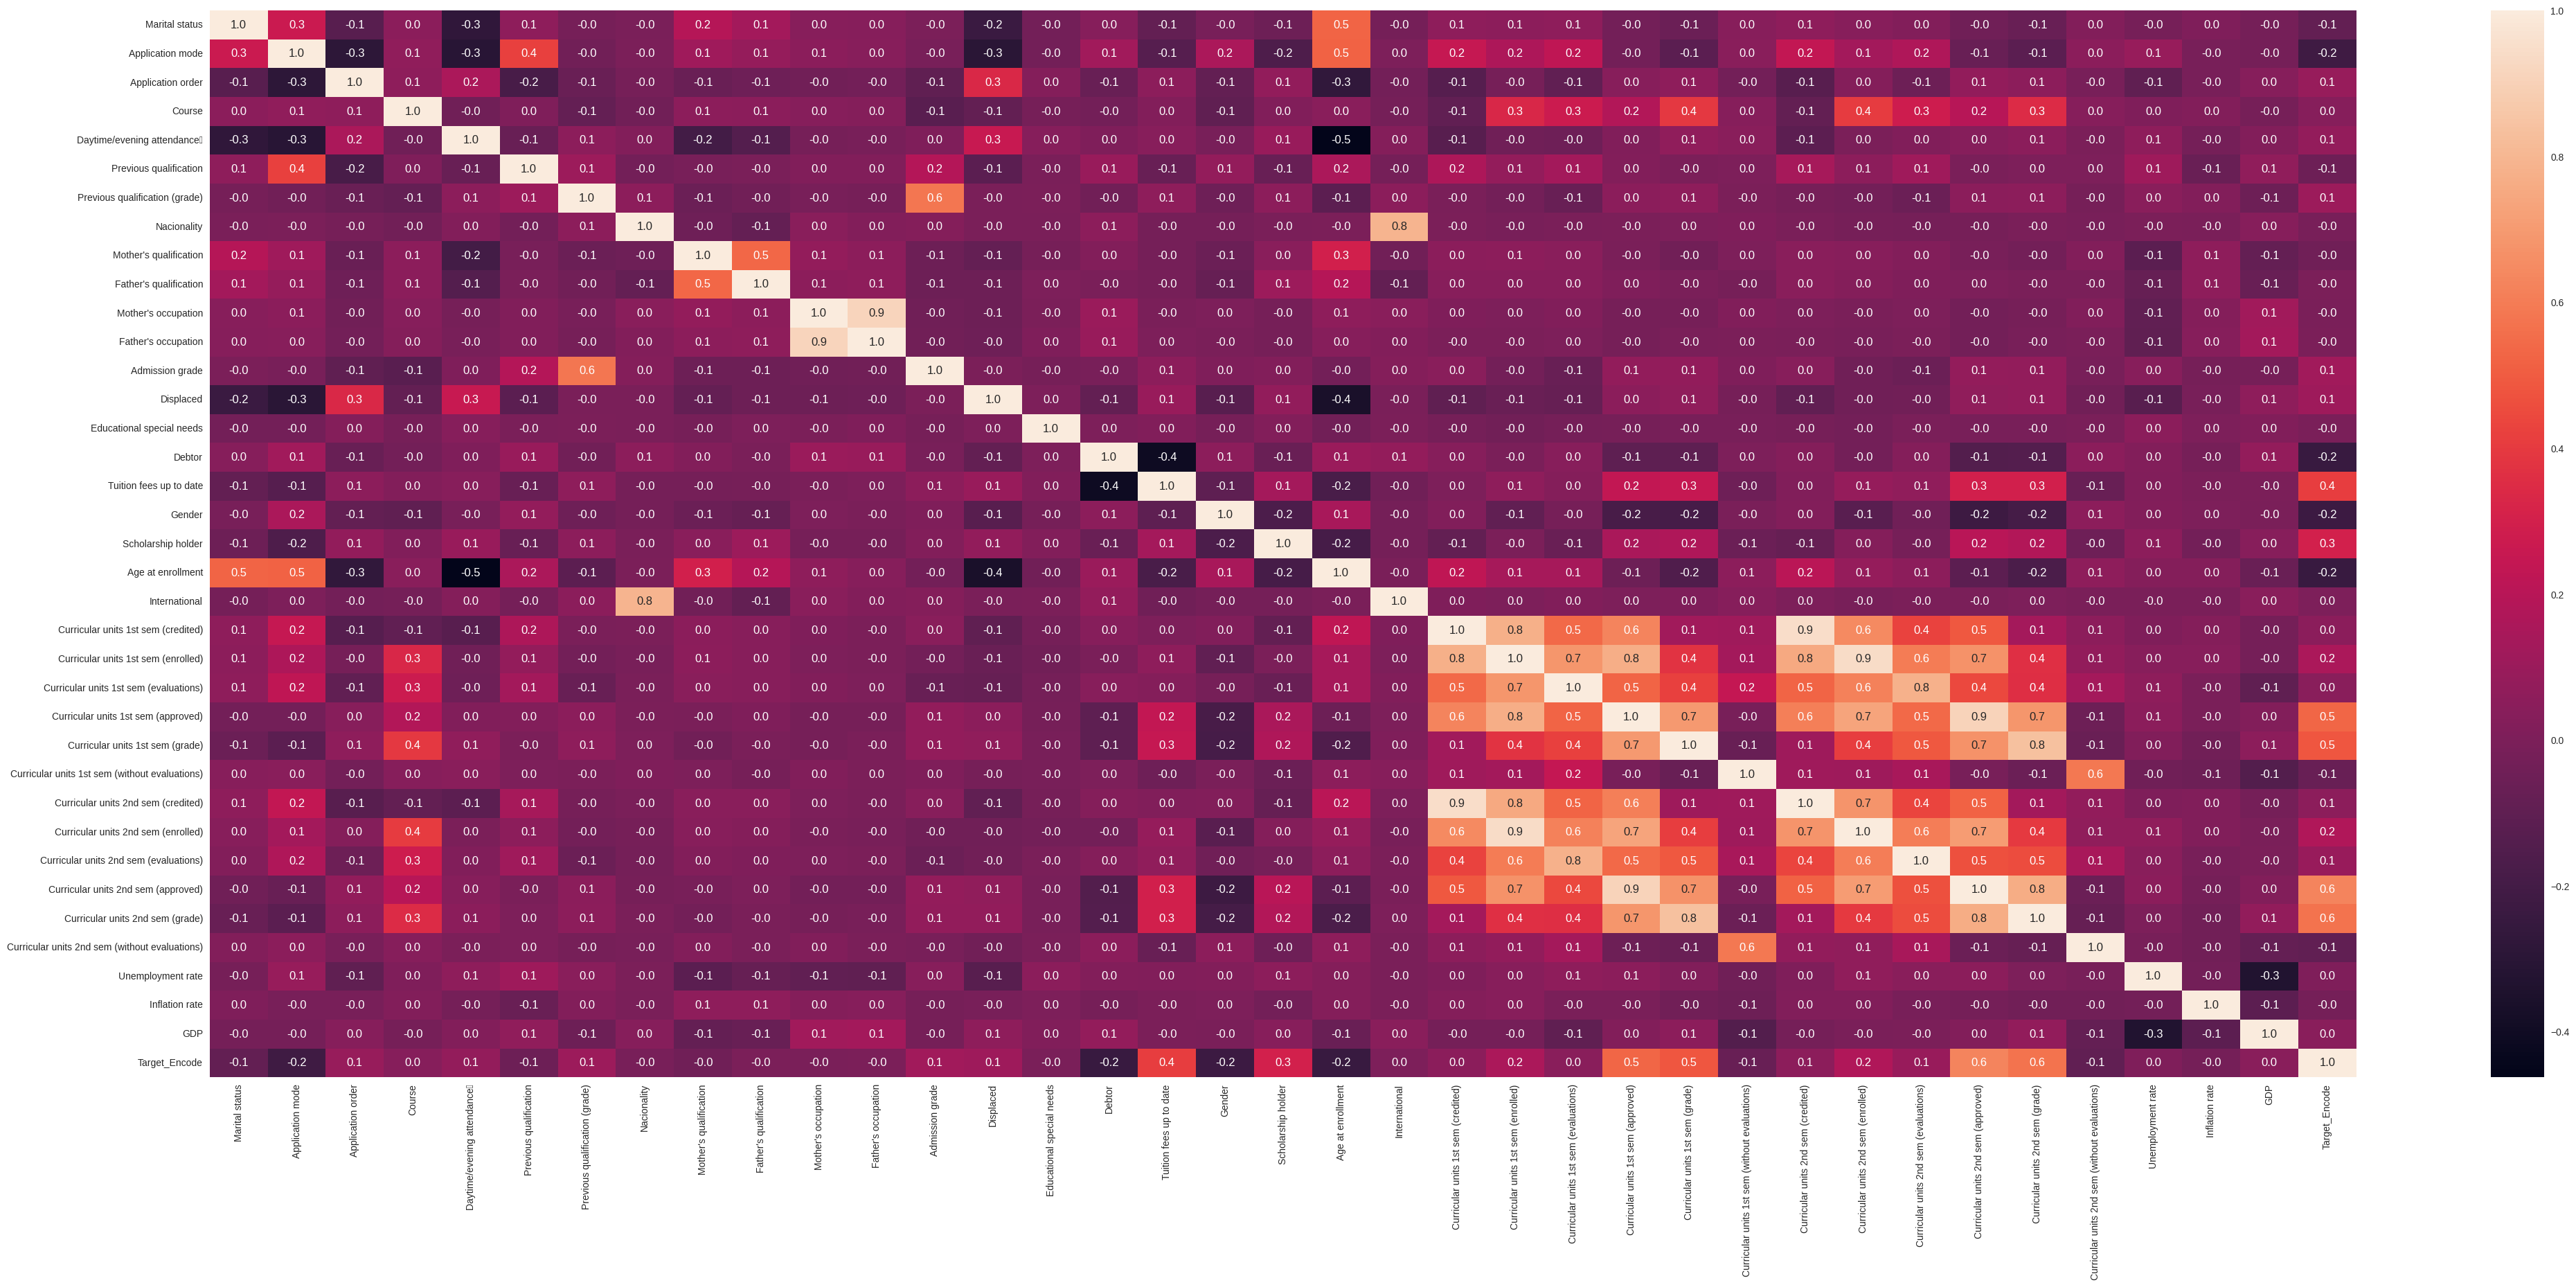

In [172]:
plt.figure(figsize=(50,20))
sns.heatmap(df_eff.corr(), annot=True, fmt='.1f')
plt.show()

## REMOVENDO DADOS COM BAIXO PESO

In [173]:
df_eff = df_eff.drop(["Course", "Nacionality", "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Educational special needs", "International", "Curricular units 1st sem (credited)", "Curricular units 1st sem (evaluations)", "Unemployment rate", "Inflation rate", "GDP"], axis = 1 )
df_eff.head()

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Admission grade,Displaced,Debtor,Tuition fees up to date,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target_Encode
0,1,17,5,1,1,122.0,127.3,1,0,1,...,0,0.000000,0,0,0,0,0,0.000000,0,0
1,1,15,1,1,1,160.0,142.5,1,0,0,...,6,14.000000,0,0,6,6,6,13.666667,0,2
2,1,1,5,1,1,122.0,124.8,1,0,0,...,0,0.000000,0,0,6,0,0,0.000000,0,0
3,1,17,2,1,1,122.0,119.6,1,0,1,...,6,13.428571,0,0,6,10,5,12.400000,0,2
4,2,39,1,0,1,100.0,141.5,0,0,1,...,5,12.333333,0,0,6,6,6,13.000000,0,2


## CONSTRUINDO VETOR X E y

In [174]:
features = df_eff.iloc[:, -1].values

X = df_eff.iloc[:, 0:-1].values

y = features
y = np_utils.to_categorical(y)

## REMOÇÃO DA COLUNA TARGET

In [175]:
df_eff = df_eff.drop(["Target_Encode"], axis = 1 )
df_eff.head()

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Admission grade,Displaced,Debtor,Tuition fees up to date,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
0,1,17,5,1,1,122.0,127.3,1,0,1,...,0,0,0.000000,0,0,0,0,0,0.000000,0
1,1,15,1,1,1,160.0,142.5,1,0,0,...,6,6,14.000000,0,0,6,6,6,13.666667,0
2,1,1,5,1,1,122.0,124.8,1,0,0,...,6,0,0.000000,0,0,6,0,0,0.000000,0
3,1,17,2,1,1,122.0,119.6,1,0,1,...,6,6,13.428571,0,0,6,10,5,12.400000,0
4,2,39,1,0,1,100.0,141.5,0,0,1,...,6,5,12.333333,0,0,6,6,6,13.000000,0


## NÚMERO DE AMOSTRAS E PARÂMETROS

In [176]:
#Número de amostras
N = df_eff.shape[0]

#Número de parâmetros
p = df_eff.shape[1]

In [177]:
print(f'Amostras = {N}\nParâmetros = {p}')

Amostras = 4424
Parâmetros = 23


## UTLIZANDO A DIMENSÃO VC PARA CALCULAR NÚMERO DE NEURONIOS

In [178]:
#DIMENSÃO VC COM A REGRA DE OURO
#Para duas camadas - d = número de features
d = p
df_eff_train = len(df_eff)*0.85

n_neurons = round((df_eff_train - 10)/(10*(d+2)))

#Pesos do modelo (parâmetros) - d + 1 pesos para cada neurônio na camada escondida e de saída
trainable = round((d+1)*n_neurons + ((n_neurons+1)*3))

print(f'-----------------\nN <= {n_neurons}\nTrainable = {trainable}\n-----------------')

-----------------
N <= 15
Trainable = 408
-----------------


## CONSTRUINDO CONJUNTO DE TREINO E TESTE

In [179]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.15, random_state = 245)

## NÚMERO DE AMOSTRAS E PARÂMETROS

In [180]:
#Número de amostras
N = df_eff.shape[0]

#Número de dados de teste
N_teste = N*0.15

#Número de parâmetros
p = df_eff.shape[1]

print(f'Amostras = {N}\nAmostras de treino = {int(df_eff_train)}\nAmostras de teste = {round(N_teste)}\nParâmetros = {p}')

Amostras = 4424
Amostras de treino = 3760
Amostras de teste = 664
Parâmetros = 23


# PARTE 2 - APRENDIZADO DE MÁQUINA

## 1) - REDE NEURAL

####Com a análise que realizamos no tratamento de dados, utilizando a dimensão VC, definimos uma rede neural com 1 camada, contendo 14 neurônios para 23 features.

####Agora, estamos realizando a validação dos dados para verificar a possibilidade de overfitting. Devido ao cálculo da dimensão VC, os resultados dos dados já são satisfatórios, mas observamos que, em alguns casos, ocorre overfitting em torno de 70 épocas.

####O tamanho do batch define o número de exemplos de treinamento que são processados em paralelo antes que os pesos da rede sejam atualizados. Com base no tamanho do conjunto de dados e nos resultados obtidos, definimos o tamanho do batch como 32. O número de épocas representa a quantidade de vezes que todo o conjunto de dados de treinamento é passado pela rede neural. Assim como o tamanho do batch, definimos o número de épocas com base na complexidade do modelo e na quantidade de dados selecionados para treinamento e teste. O valor padrão é 100, mas pode ser modificado conforme necessário, como para a validação do overfitting.

####Além disso, implementamos um método de regularização utilizando o dropout. Essa técnica desativa aleatoriamente um conjunto de neurônios em uma camada durante cada etapa do treinamento, assim como utilizamos a penalidade l2, que penaliza os valores altos dos pesos, incentivando-os a ficarem próximos de zero a fim de melhorar a generalização dos resultados.

### ARQUITETURA

#### ARQUITETURA DVC - NÚMERO DE NEURÔNIOS COM A REGRA DE OURO

In [ ]:
model = Sequential()
model.add(Dense(15, activation='softmax', input_dim=23))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

#### DIMENSÃO VC - KERAS

In [182]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 15)                360       
                                                                 
 dense_29 (Dense)            (None, 3)                 48        
                                                                 
Total params: 408
Trainable params: 408
Non-trainable params: 0
_________________________________________________________________


#### EXECUÇÃO DO MODELO DVC

In [183]:
hist = model.fit(X_treino, y_treino, epochs=100, batch_size=32)

Epoch 1/100
118/118 [==============================] - 1s 2ms/step - loss: 1.0223 - categorical_accuracy: 0.5069
Epoch 2/100
118/118 [==============================] - 0s 2ms/step - loss: 0.9657 - categorical_accuracy: 0.6048
Epoch 3/100
118/118 [==============================] - 0s 2ms/step - loss: 0.9275 - categorical_accuracy: 0.6306
Epoch 4/100
118/118 [==============================] - 0s 2ms/step - loss: 0.9080 - categorical_accuracy: 0.6391
Epoch 5/100
118/118 [==============================] - 0s 3ms/step - loss: 0.8901 - categorical_accuracy: 0.6489
Epoch 6/100
118/118 [==============================] - 0s 3ms/step - loss: 0.8703 - categorical_accuracy: 0.6566
Epoch 7/100
118/118 [==============================] - 0s 3ms/step - loss: 0.8311 - categorical_accuracy: 0.6886
Epoch 8/100
118/118 [==============================] - 0s 3ms/step - loss: 0.8006 - categorical_accuracy: 0.7059
Epoch 9/100
118/118 [==============================] - 0s 3ms/step - loss: 0.7784 - categorical_

#### ANÁLISE GRÁFICA - MODELO DVC

118/118 [==============================] - 0s 1ms/step
--> Acuracia (treino): 0.7035
21/21 [==============================] - 0s 1ms/step
--> Acuracia (teste): 0.6928


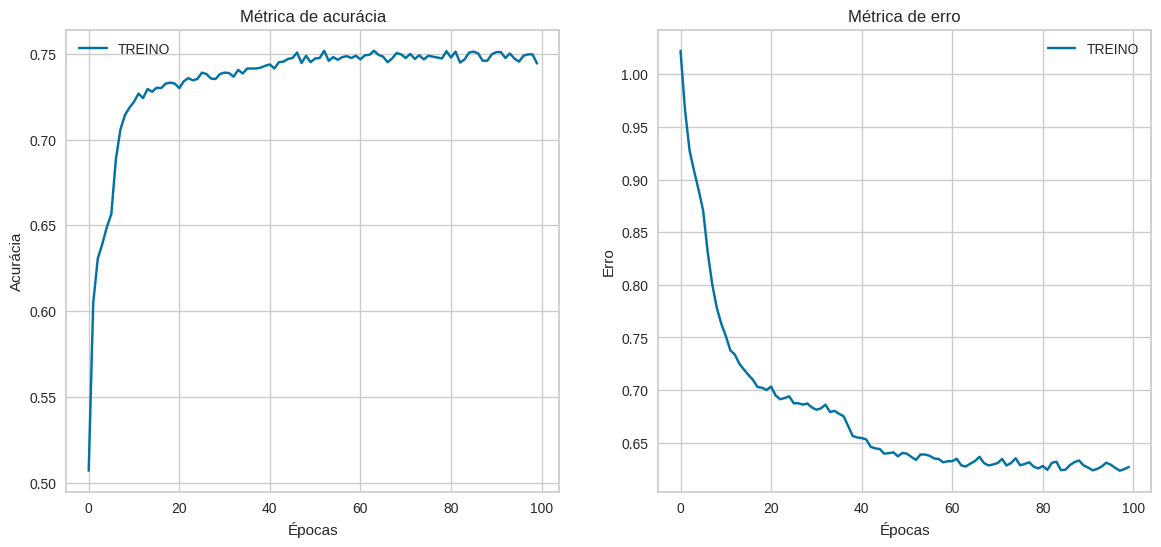

In [184]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))

axs[0].plot(hist.history['categorical_accuracy'])
axs[0].set_title('Métrica de acurácia')
axs[0].set_xlabel('Épocas')
axs[0].set_ylabel('Acurácia')
axs[0].legend(['TREINO'])

axs[1].plot(hist.history['loss'])
axs[1].set_title('Métrica de erro')
axs[1].set_xlabel('Épocas')
axs[1].set_ylabel('Erro')
axs[1].legend(['TREINO'])

pred = np.round(model.predict(X_treino))
print(f'--> Acuracia (treino): {accuracy_score(y_treino, pred):.4f}')

pred = np.round(model.predict(X_teste))
print(f'--> Acuracia (teste): {accuracy_score(y_teste, pred):.4f}')

### VALIDAÇÃO

#### USANDO VALIDAÇÃO PARA VERIFICAR OVERFITTING

In [185]:
model = Sequential()
model.add(Dense(15, activation='relu', input_dim=23))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [186]:
hist = model.fit(X_treino, y_treino, validation_data=(X_teste, y_teste), epochs=100, batch_size=32)

Epoch 1/100
118/118 [==============================] - 1s 3ms/step - loss: 4.1827 - categorical_accuracy: 0.4949 - val_loss: 2.0391 - val_categorical_accuracy: 0.5798
Epoch 2/100
118/118 [==============================] - 0s 2ms/step - loss: 1.8705 - categorical_accuracy: 0.5739 - val_loss: 1.6834 - val_categorical_accuracy: 0.5542
Epoch 3/100
118/118 [==============================] - 0s 3ms/step - loss: 1.5257 - categorical_accuracy: 0.5923 - val_loss: 1.4108 - val_categorical_accuracy: 0.6099
Epoch 4/100
118/118 [==============================] - 0s 3ms/step - loss: 1.2739 - categorical_accuracy: 0.6064 - val_loss: 1.2018 - val_categorical_accuracy: 0.6235
Epoch 5/100
118/118 [==============================] - 0s 4ms/step - loss: 1.1003 - categorical_accuracy: 0.6234 - val_loss: 1.0772 - val_categorical_accuracy: 0.6175
Epoch 6/100
118/118 [==============================] - 0s 3ms/step - loss: 0.9923 - categorical_accuracy: 0.6415 - val_loss: 0.9978 - val_categorical_accuracy: 0.647

118/118 [==============================] - 0s 2ms/step
--> Acuracia (treino): 0.7226
21/21 [==============================] - 0s 2ms/step
--> Acuracia (teste): 0.7199


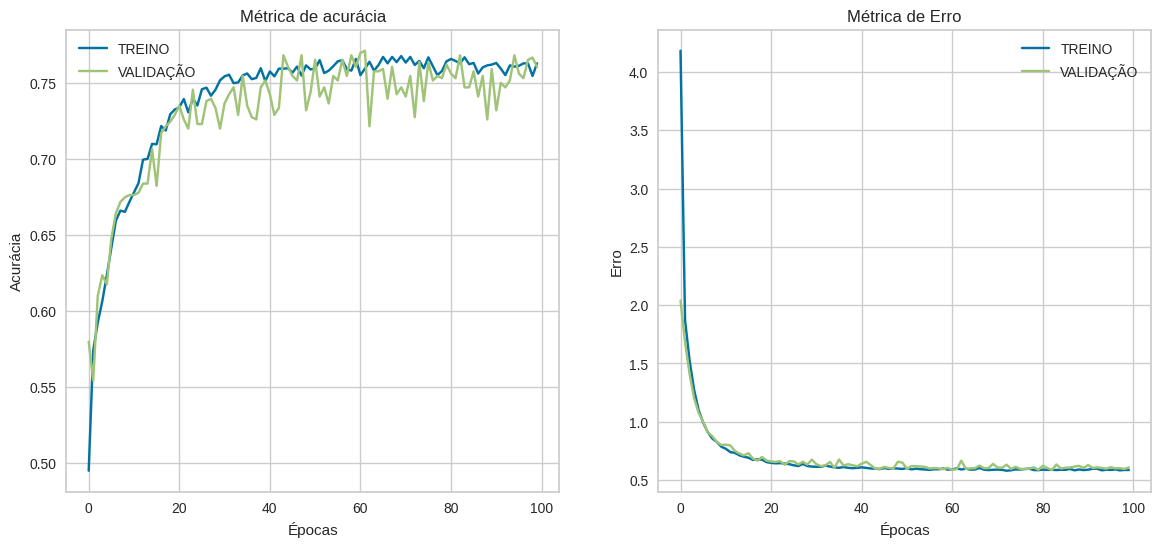

In [187]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))

axs[0].plot(hist.history['categorical_accuracy'])
axs[0].plot(hist.history['val_categorical_accuracy'])
axs[0].set_title('Métrica de acurácia')
axs[0].set_xlabel('Épocas')
axs[0].set_ylabel('Acurácia')
axs[0].legend(['TREINO', 'VALIDAÇÃO'])

axs[1].plot(hist.history['loss'])
axs[1].plot(hist.history['val_loss'])
axs[1].set_title('Métrica de Erro')
axs[1].set_xlabel('Épocas')
axs[1].set_ylabel('Erro')
axs[1].legend(['TREINO', 'VALIDAÇÃO'])

pred = np.round(model.predict(X_treino))
print(f'--> Acuracia (treino): {accuracy_score(y_treino, pred):.4f}')

pred = np.round(model.predict(X_teste))
print(f'--> Acuracia (teste): {accuracy_score(y_teste, pred):.4f}')

### CONSERTAR OVERFITTING

#### REDE NEURAL - TESTE COM REGULARIZERS E DROPOUT

In [188]:
model = Sequential()
model.add(Dense(15, kernel_regularizer=regularizers.l2(0.01), activation='softmax', input_dim=23))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

#### EXECUÇÃO DO MODELO REGULARIZADO

In [189]:
hist = model.fit(X_treino, y_treino,  validation_data=(X_teste, y_teste),epochs=100, batch_size=32)

Epoch 1/100
118/118 [==============================] - 1s 4ms/step - loss: 1.1559 - categorical_accuracy: 0.4989 - val_loss: 1.0866 - val_categorical_accuracy: 0.5572
Epoch 2/100
118/118 [==============================] - 0s 3ms/step - loss: 1.0549 - categorical_accuracy: 0.5633 - val_loss: 1.0114 - val_categorical_accuracy: 0.5858
Epoch 3/100
118/118 [==============================] - 0s 2ms/step - loss: 0.9880 - categorical_accuracy: 0.6045 - val_loss: 0.9515 - val_categorical_accuracy: 0.6280
Epoch 4/100
118/118 [==============================] - 0s 3ms/step - loss: 0.9334 - categorical_accuracy: 0.6524 - val_loss: 0.9161 - val_categorical_accuracy: 0.6536
Epoch 5/100
118/118 [==============================] - 0s 3ms/step - loss: 0.9042 - categorical_accuracy: 0.6625 - val_loss: 0.8934 - val_categorical_accuracy: 0.6657
Epoch 6/100
118/118 [==============================] - 0s 2ms/step - loss: 0.8864 - categorical_accuracy: 0.6684 - val_loss: 0.8793 - val_categorical_accuracy: 0.668

#### GRÁFICO DO MODELO REGULARIZADO

118/118 [==============================] - 0s 1ms/step
--> Acuracia (treino): 0.7011
21/21 [==============================] - 0s 1ms/step
--> Acuracia (teste): 0.7003


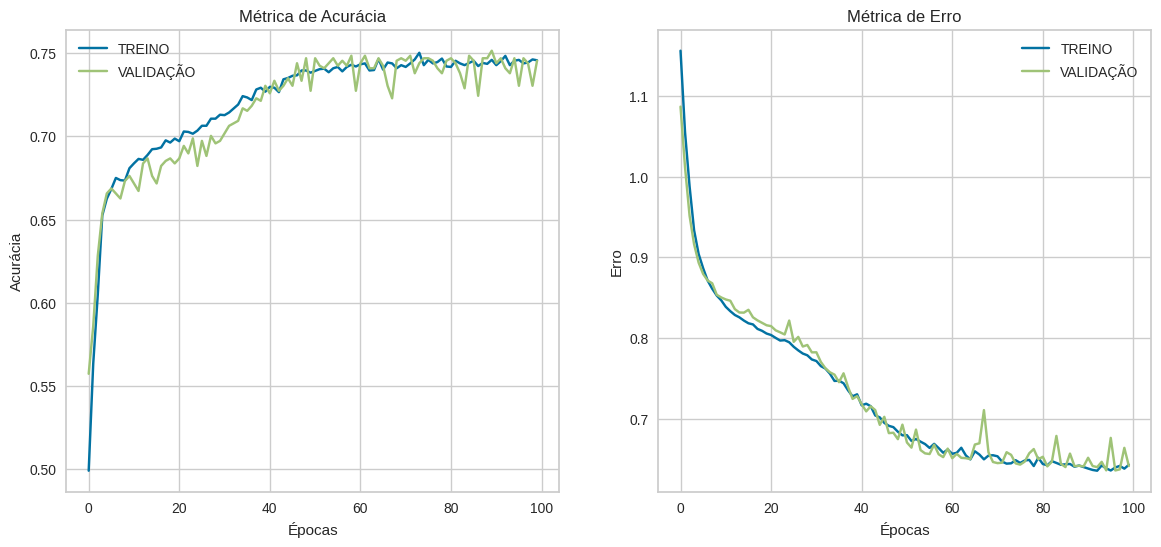

In [190]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))

axs[0].plot(hist.history['categorical_accuracy'])
axs[0].plot(hist.history['val_categorical_accuracy'])
axs[0].set_title('Métrica de Acurácia')
axs[0].set_xlabel('Épocas')
axs[0].set_ylabel('Acurácia')
axs[0].legend(['TREINO','VALIDAÇÃO'])

axs[1].plot(hist.history['loss'])
axs[1].plot(hist.history['val_loss'])
axs[1].set_title('Métrica de Erro')
axs[1].set_xlabel('Épocas')
axs[1].set_ylabel('Erro')
axs[1].legend(['TREINO','VALIDAÇÃO'])

pred = np.round(model.predict(X_treino))
print(f'--> Acuracia (treino): {accuracy_score(y_treino, pred):.4f}')

pred = np.round(model.predict(X_teste))
print(f'--> Acuracia (teste): {accuracy_score(y_teste, pred):.4f}')

## 2) - ÁRVORE DE DECISÃO

####Começamos a montagem da árvore de decisão de forma ingênua utilizando os dados de treinamento. Em seguida, calculamos o Ein e o Eout para verificar a possibilidade de overfitting e observamos uma leve presença desse fenômeno, mesmo com um resultado muito bom. Para lidar com isso, aplicamos a regularização α utilizando o método de Minimal Cost-Complexity na classe DecisionTreeClassifier.

####Realizamos a validação do α e testamos a acurácia de cada conjunto. Após encontrar α que minimiza a relação de pureza para a impureza das folhas, plotamos a árvore com o melhor α encontrado e aplicamos o cross validation ao encontrar o k com a regra de ouro para a cross validation.

### EXECUÇÃO DO MODELO E GRÁFICO DA ÁRVORE

In [191]:
tree = DecisionTreeClassifier(random_state=245)
tree.fit(X_treino, y_treino)

print('Ein: %0.4f' % (1 - accuracy_score(y_treino, tree.predict(X_treino))))
print('Eout: %0.4f' % (1 - accuracy_score(y_teste, tree.predict(X_teste))))
print(classification_report(y_teste, tree.predict(X_teste), zero_division=0))

features_label = features

class_label = ['0','1','2']

#Desenho da árvore
plt.figure(figsize=(50,20))
plot_tree(
    tree,
    feature_names = features_label,
    class_names = class_label,
    filled=True,
    proportion = True,
    fontsize=6,
    rounded = True)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### MINIMAL COST COMPLEXITY PRUNING ($alpha$)

[0.00000000e+00 9.45626478e-05 1.05069609e-04 1.10323089e-04
 1.12830432e-04 1.13657029e-04 1.14509456e-04 1.15740741e-04
 1.16092536e-04 1.17189311e-04 1.17550253e-04 1.20551808e-04
 1.32978723e-04 1.32978723e-04 1.47754137e-04 1.47754137e-04
 1.47754137e-04 1.47754137e-04 1.51975684e-04 1.51975684e-04
 1.51975684e-04 1.51975684e-04 1.51975684e-04 1.51975684e-04
 1.51975684e-04 1.55141844e-04 1.55141844e-04 1.57604413e-04
 1.57604413e-04 1.57604413e-04 1.57604413e-04 1.59574468e-04
 1.59574468e-04 1.61186331e-04 1.61186331e-04 1.61186331e-04
 1.62332545e-04 1.62529551e-04 1.62529551e-04 1.62529551e-04
 1.62529551e-04 1.63666121e-04 1.63666121e-04 1.63666121e-04
 1.63666121e-04 1.63666121e-04 1.63666121e-04 1.63666121e-04
 1.65484634e-04 1.65885517e-04 1.66393890e-04 1.66875261e-04
 1.67454689e-04 1.67454689e-04 1.67973124e-04 1.67973124e-04
 1.68632439e-04 1.69245648e-04 1.70068027e-04 1.70212766e-04
 1.70485543e-04 1.70485543e-04 1.70738114e-04 1.71202478e-04
 1.71585450e-04 1.720901

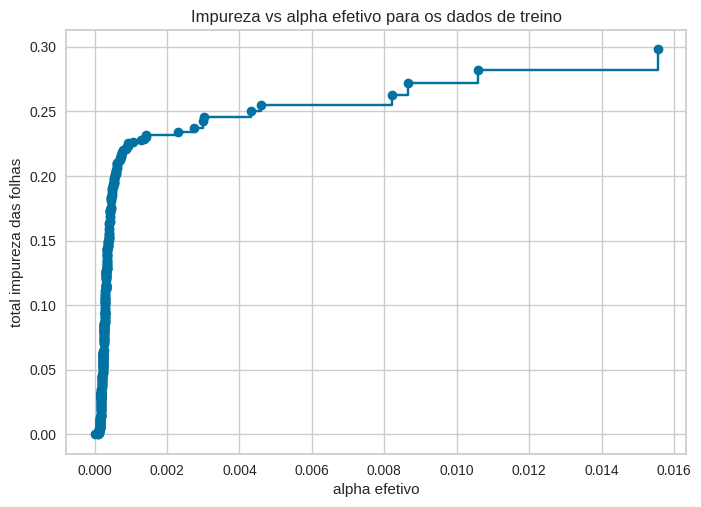

In [192]:
#Recupera os valores efetivos de alpha para a elaboração da fase de prunning
path = tree.cost_complexity_pruning_path(X_treino, y_treino)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#Plota a relação entre os valores de alpha e impureza das folhas
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("alpha efetivo")
ax.set_ylabel("total impureza das folhas")
ax.set_title("Impureza vs alpha efetivo para os dados de treino")
fig.show()

print(ccp_alphas)
print(impurities)

### VERIFICAÇÃO DA VALIDAÇÃO DE $alpha$

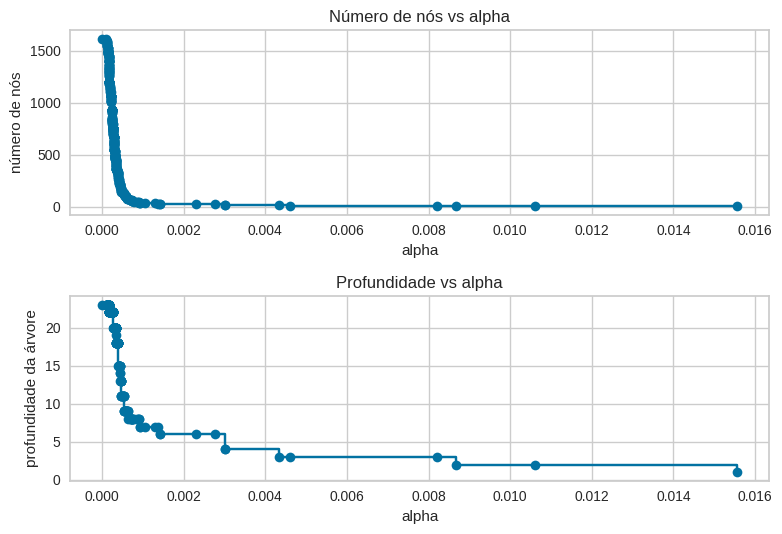

In [193]:
trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=245, ccp_alpha=ccp_alpha)
    tree.fit(X_treino, y_treino)
    trees.append(tree)

#Descarta o último por ser trivial (apenas o nó raiz)
trees = trees[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [tree.tree_.node_count for tree in trees]
depth = [tree.tree_.max_depth for tree in trees]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("número de nós")
ax[0].set_title("Número de nós vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("profundidade da árvore")
ax[1].set_title("Profundidade vs alpha")
fig.tight_layout()

### ACURÁCIA DE CADA CONJUNTO DE DADOS

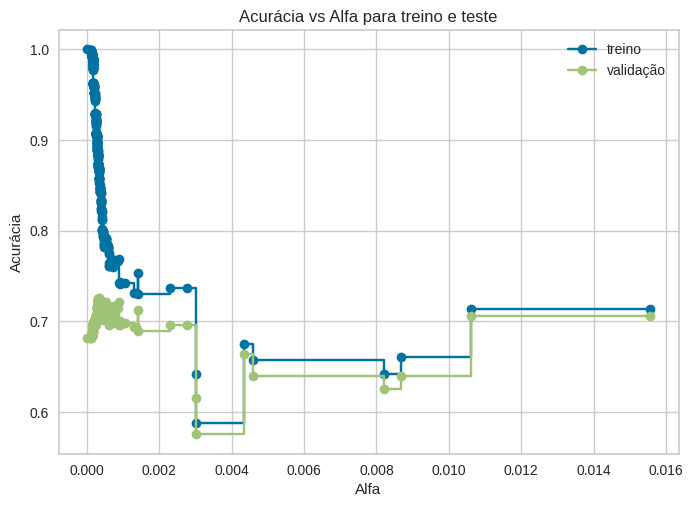

In [194]:
train_scores = [tree.score(X_treino, y_treino) for tree in trees]
val_scores = [tree.score(X_teste, y_teste) for tree in trees]

fig, ax = plt.subplots()
ax.set_xlabel("Alfa")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia vs Alfa para treino e teste")
ax.plot(ccp_alphas, train_scores, marker="o", label="treino", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker="o", label="validação", drawstyle="steps-post")
ax.legend()
plt.show()

### CONSTRUÇÃO DO *DecisionTreeClassifier* COM MELHOR VALOR DE $ccp\_alpha$ NA INSTÂNCIA DE VALIDAÇÃO

Ein: 0.2867
Eout: 0.2937
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       207
           1       1.00      0.00      0.00       123
           2       0.72      0.93      0.81       334

   micro avg       0.71      0.71      0.71       664
   macro avg       0.80      0.56      0.51       664
weighted avg       0.76      0.71      0.63       664
 samples avg       0.71      0.71      0.71       664



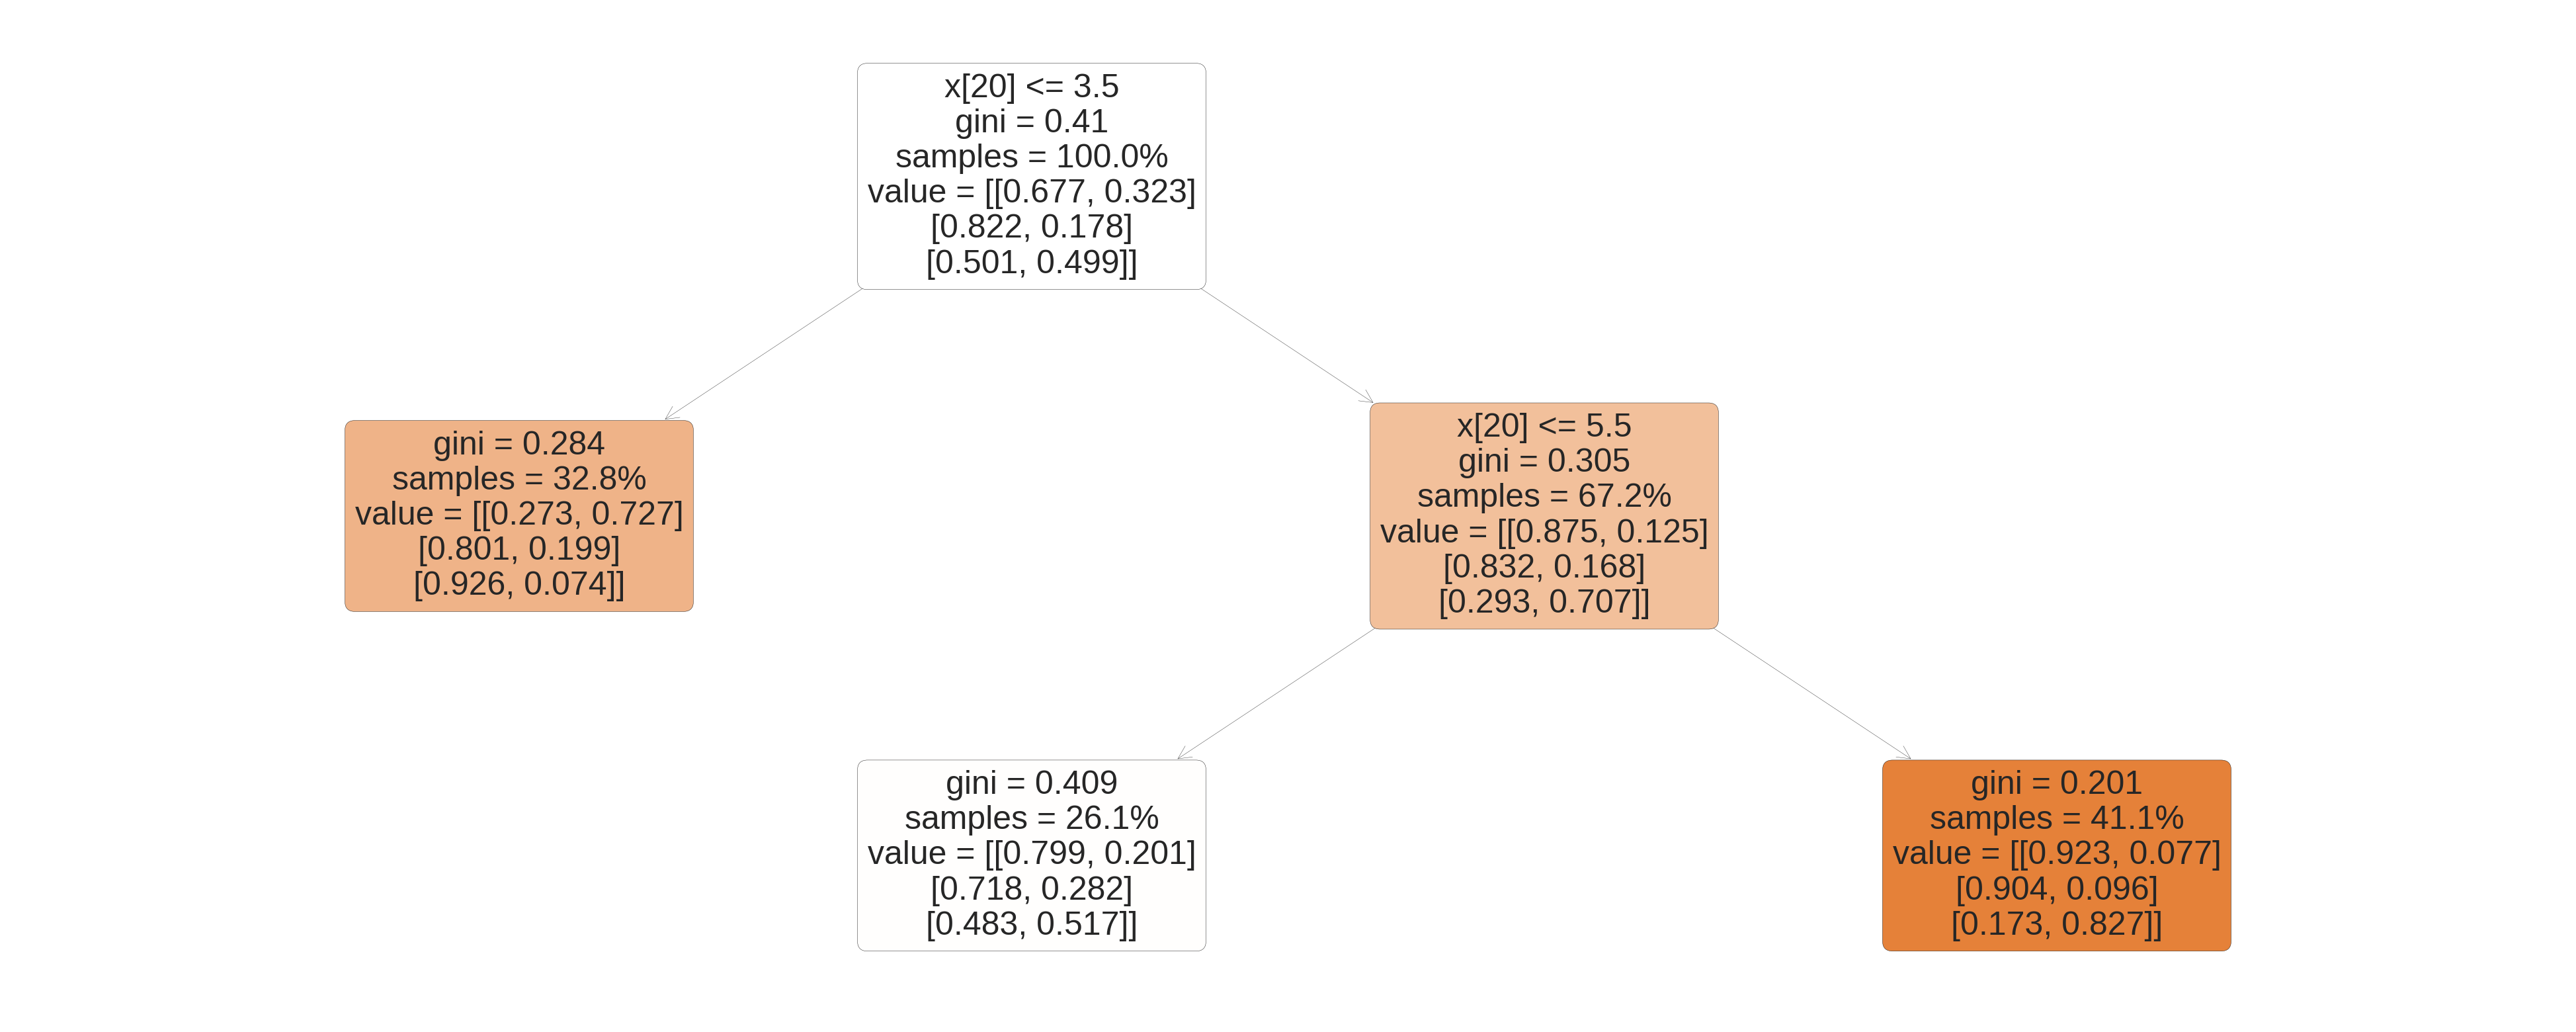

In [195]:
tree_2 = DecisionTreeClassifier(random_state=245, ccp_alpha= 0.0150411)
tree_2.fit(X_treino, y_treino)

print('Ein: %0.4f' % (1 - accuracy_score(y_treino, tree_2.predict(X_treino))))
print('Eout: %0.4f' % (1 - accuracy_score(y_teste, tree_2.predict(X_teste))))
print(classification_report(y_teste, tree_2.predict(X_teste),zero_division=1))

#Desenho da árvore
plt.figure(figsize=(50,20))
plot_tree(
    tree_2,
    filled=True,
    proportion = True,
    fontsize=36,
    rounded = True)
plt.show()

### CÁLCULO DO FOLD PARA CROSS-VALIDATION

In [196]:
from sklearn.model_selection import KFold
#REGRA DE OURO PARA CROSS VALIDATION
#K = round(len(X_treino)/5)
K = KFold(n_splits=10, shuffle=True)
print(f'K = {K}')

K = KFold(n_splits=10, random_state=None, shuffle=True)


### *GRID SEARCH CV* PARA UTILIZAÇÃO NOS DADOS DE TESTE

In [197]:
tree_3 = DecisionTreeClassifier(random_state=245)
path = tree_3.cost_complexity_pruning_path(X_treino, y_treino)

param_grid = {'ccp_alpha': path.ccp_alphas}

CV_tree_3 = GridSearchCV(estimator=tree_3, param_grid=param_grid, cv = K, verbose=3, n_jobs=-1)
%time CV_tree_3.fit(X_treino, y_treino)

print('Ein: %0.4f' % (1 - accuracy_score(y_treino, CV_tree_3.predict(X_treino))))
print('Eout: %0.4f' % (1 - accuracy_score(y_teste, CV_tree_3.predict(X_teste))))
print(classification_report(y_teste, CV_tree_3.predict(X_teste), zero_division=1))


Fitting 10 folds for each of 405 candidates, totalling 4050 fits
CPU times: user 5.35 s, sys: 498 ms, total: 5.85 s
Wall time: 1min 58s
Ein: 0.2245
Eout: 0.2937
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       207
           1       0.45      0.28      0.35       123
           2       0.80      0.89      0.84       334

   micro avg       0.74      0.71      0.72       664
   macro avg       0.67      0.61      0.63       664
weighted avg       0.72      0.71      0.71       664
 samples avg       0.76      0.71      0.71       664



## 3) - SVM

####Iniciamos o SVM utilizando o grid search CV para encontrar os melhores valores de C e Gama. O valor do fold foi definido com base no tamanho do conjunto de treinamento. Após encontrar os valores ideais de C e Gama, realizamos a predição utilizando esses parâmetros otimizados.

####Além disso, estabelecemos um valor de referência para o Eout, que determinamos como uma boa generalização e uma má generalização. Com base nisso, calculamos as métricas de classificação para avaliar o desempenho do modelo.

### EXECUÇÃO DO MODELO UTILIZANDO O *GRID SEARCH CV* PARA ENCONTRAR *C* e GAMA

In [199]:
param_grid = {'estimator__C': [1, 10, 50, 100, 150],
              'estimator__gamma': [0.0001, 0.001, 0.01, 0.1, 1]}

svm = SVC(kernel='rbf')

ovr_classifier = OneVsRestClassifier(svm)

grid = GridSearchCV(estimator=ovr_classifier, param_grid=param_grid, cv=K, error_score='raise')

%time grid.fit(X_treino, y_treino)
print(grid.best_params_)

CPU times: user 11min 10s, sys: 982 ms, total: 11min 11s
Wall time: 11min 35s
{'estimator__C': 150, 'estimator__gamma': 0.0001}


### PREDIÇÃO COM MELHORES VALORES DE *C* E GAMA E RELATÓRIO DE CLASSIFICAÇÃO

In [200]:
svm = grid.best_estimator_

# making predictions on the testing set
y_pred = svm.predict(X_teste)

print('Ein: %0.4f' % (1 - accuracy_score(y_treino, svm.predict(X_treino))))
print('Eout: %0.4f' % (1 - accuracy_score(y_teste, svm.predict(X_teste))))
print(classification_report(y_teste, y_pred,zero_division=1))

Ein: 0.3152
Eout: 0.3298
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       207
           1       1.00      0.00      0.00       123
           2       0.82      0.90      0.86       334

   micro avg       0.83      0.67      0.74       664
   macro avg       0.89      0.54      0.54       664
weighted avg       0.86      0.67      0.67       664
 samples avg       0.86      0.67      0.67       664



# PARTE 3 - ESCOLHA DO MELHOR MODELO

####Agora, realizamos uma métrica de validação para determinar qual foi o melhor modelo para o nosso conjunto de dados, com base nos valores de Eout obtidos na instância de teste. Nesse caso foi a Árvore de Decisão.

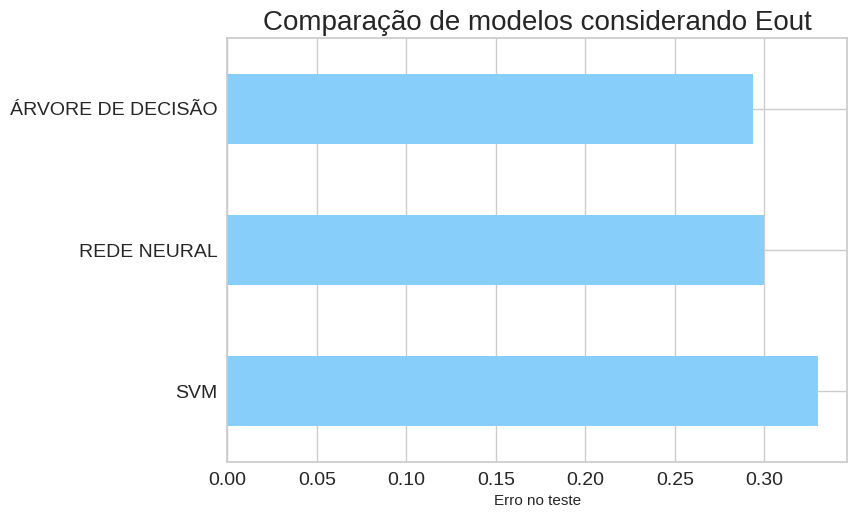

In [201]:
NN_eout = round(1 - accuracy_score(y_teste, pred),4)
tree_eout = round(1 - accuracy_score(y_teste, CV_tree_3.predict(X_teste)),4)
svm_eout = round(1 - accuracy_score(y_teste, svm.predict(X_teste)),4)

model_comparison = pd.DataFrame({"model": ["REDE NEURAL", "SVM", 'ÁRVORE DE DECISÃO'],
                                 "Eout": [NN_eout, svm_eout, tree_eout]})
model_comparison.sort_values("Eout", ascending=False).plot(x="model", y="Eout", kind="barh",
                                                           color="lightskyblue", legend=False)
plt.ylabel(""); plt.yticks(size=14); plt.xlabel("Erro no teste"); plt.xticks(size=14)
plt.title("Comparação de modelos considerando Eout", size=20);